### N-queens : 

Write fuction that will return the indexes of queens where none can attack the others.
                - Will include an isGoal(Solution) function to check if the current solution is the goal
                - Will also include a getFitness(solution) fuction to calculate current number of attacking pairs

In [1]:
### Headers
import numpy as np
import pandas as pn
import math as m
import random as rand
import copy


In [2]:
### Helper Functions

def isGoal(x):
    for i in range (x.shape[0] - 1):
        for j in range (i + 1, x.shape[0]):
            if x[i] == x[j]:
                return False
            if abs(i - j) == abs(x[i] - x[j]):
                return False
    return True

isGoal(np.asarray([1,3,0,2]))


def quality(x):
    cnt = 0
    for i in range (x.shape[0] - 1):
        for j in range (i + 1, x.shape[0]):
            if x[i] == x[j]:
                cnt = cnt + 1
            if abs(i - j) == abs(x[i] - x[j]):
                cnt = cnt + 1
    return cnt


### Using MonteCarlo

In [3]:
def genarateRandomly(n):
    x = np.zeros(n)
    
    for i in range (n):
        x[i] = x[i] + (rand.randint(0, n - 1)) 
    
    return x


In [5]:
def MonteCarlo(n, maxIter):
    sQuality = []
    
    for i in range (maxIter):
        s = genarateRandomly(n)
        sQuality.insert(i, quality(s))
        
        if isGoal(s):
            res = [s, sQuality]
            return res
        
        
    res = ["Failure", sQuality]
    return res
    

#MonteCarlo(4, 100)

### Using Gibbs

In [6]:
def genarateRandomNeighbor(s):
    sprime = copy.deepcopy(s)
    
    sprime[rand.randint(0, (s.shape[0] - 1))] = rand.randint(0, (s.shape[0] - 1))
    
    return sprime

###genarateRandomNeighbor(np.array([0,1,2,3]))

In [8]:
def Gibbs(n, maxIter):
    sQuality = []
    
    s = genarateRandomly(n)
    sQuality.insert(0, quality(s))
    
    if isGoal(s):
        res = [s, sQuality]
        return res
    
    for i in range (maxIter):
        sprime = genarateRandomNeighbor(s)
        sQuality.insert(i + 1, quality(sprime))
        
        if isGoal(sprime):
            res = [sprime, sQuality]
            return res
        
        s = sprime
        
    res = ["Failure", sQuality]
    return res
    
    
#Gibbs(4,100)

### Using Hill Climbing

In [9]:
def genarateRandomNeighbor(s):
    sprime = copy.deepcopy(s)
    
    sprime[rand.randint(0, (s.shape[0] - 1))] = rand.randint(0, (s.shape[0] - 1))
    
    return sprime



In [10]:
def HillDescent(n, maxIter):
    sQuality = []
    
    s = genarateRandomly(n)
    sQuality.insert(0, quality(s))
    
    if isGoal(s):
        res = [s, sQuality]
        return res
        
        
    # For improving initial guess
    #for i in range (0,10):
    #    s_new = genarateRandomly(n)
    
    #    if isGoal(s_new):
    #        return s_new
        
    #    if quality(s_new) <= quality(s):
    #        s = s_new
            
               
    for i in range (maxIter):
        sprime = genarateRandomNeighbor(s)
        
        if isGoal(sprime):
            sQuality.insert(i + 1, 0)
            res = [sprime, sQuality]
            return res
        
        if quality(sprime) <= quality(s):
            s = sprime
            
        sQuality.insert(i + 1, quality(s))
        
    res = ["Failure", sQuality]
    return res
    


### Comparison and plotting in graph

#### N = 5

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


#initializations N = 5
maxIter = 1000
i = 5

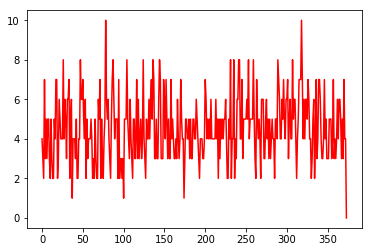

In [13]:
# Plotting results produced by MonteCarlo

res1 = MonteCarlo(i, maxIter) 

Iter = [j for j in range (0, len(res1[1]))]
plt.plot (Iter, res1[1], color = 'red')

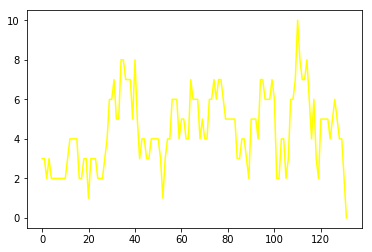

In [14]:
#Plotting results genarated by Gibbs
res2 = Gibbs(i, maxIter)
  
Iter = [j for j in range (0, len(res2[1]))]
plt.plot (Iter, res2[1], color = 'yellow')

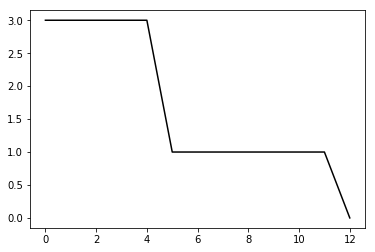

In [15]:
#Plotting results genarated by Hill Climbing(Or Descent in this case)
res3 = HillDescent(i, maxIter)
Iter = [j for j in range (0, len(res3[1]))]
plt.plot (Iter, res3[1], color = 'black')


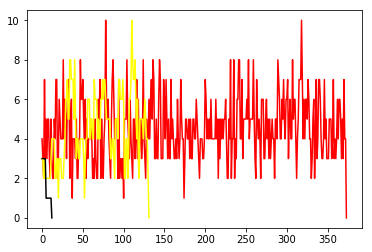

In [16]:
#Plotting all three in the same graph to compare results

Iter = [j for j in range (0, len(res1[1]))]
plt.plot (Iter, res1[1], color = 'red')

Iter = [j for j in range (0, len(res2[1]))]
plt.plot (Iter, res2[1], color = 'yellow')

Iter = [j for j in range (0, len(res3[1]))]
plt.plot (Iter, res3[1], color = 'black')

#### N = 10

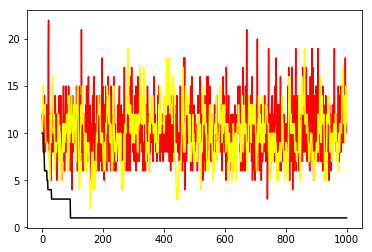

In [18]:
maxIter = 1000
i = 10


res1 = MonteCarlo(i, maxIter)
res2 = Gibbs(i, maxIter)
res3 = HillDescent(i, maxIter)

Iter = [j for j in range (0, len(res1[1]))]
plt.plot (Iter, res1[1], color = 'red')

Iter = [j for j in range (0, len(res2[1]))]
plt.plot (Iter, res2[1], color = 'yellow')

Iter = [j for j in range (0, len(res3[1]))]
plt.plot (Iter, res3[1], color = 'black')